### ***Morphological Transformations***
---
[Tutorial : Opencv](https://docs.opencv.org/4.5.2/d9/d61/tutorial_py_morphological_ops.html)

In [1]:
# imports
import numpy as np
import cv2 as cv
import sys

lib_dir="E:\Coding\Computer Vision\cv-libs"
im_dir = r'E:/Semester 4/EN2550_FundamentalsOfImageProcessing/Fun-Time/Exercises/images/'

# Importing Custom Functions
sys.path.append(lib_dir)
from show_images import show_images

***Dilation and Erosion***

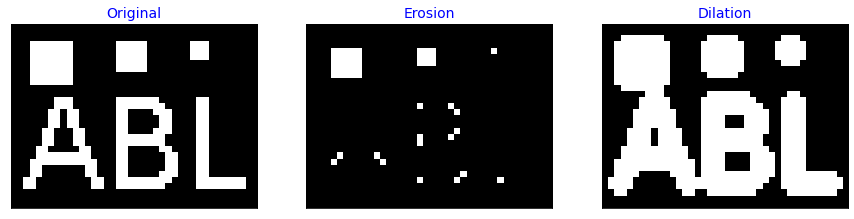

In [2]:
img = cv.imread(im_dir+'morpho.tif', 0)
assert img is not None

# kernel = np.ones((3,3), np.uint8)
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3)) # 3x3 cross
dil = cv.dilate(img, kernel)
err = cv.erode(img, kernel)

# # Creating a larger image for saving
# dst = np.zeros((img.shape[0]*10, img.shape[1]*10), np.uint8)
# for i in range(0, img.shape[0]):
#     for j in range(0, img.shape[1]):
#         dst[10*i:10*(i+1)+ 1, 10*j:10*(j+1)+ 1] = new[i,j]
    
# cv.imwrite('opened.png', dst)


show_images([[img,'g',"Original"],[err,'g','Erosion'],[dil,'g',"Dilation"]])

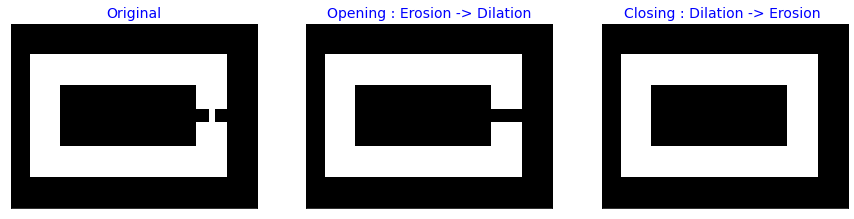

In [5]:
# Morphological Transforms: Opening and Closing

img = cv.imread(im_dir+'morpho1.tif', 0)
kernel = np.ones((3,3), np.uint8)
ope = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)           # Opening -> erosion followd by dilation
clo = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)          # Closing -> dilation followed by erosion


# dst = np.zeros((img.shape[0]*10, img.shape[1]*10), np.uint8)
# for i in range(0, img.shape[0]):
#     for j in range(0, img.shape[1]):
#         dst[10*i:10*(i+1)+ 1, 10*j:10*(j+1)+ 1] = new[i,j]
       

show_images([[img,'g',"Original"],[ope,'g',"Opening : Erosion -> Dilation"],[clo,'g',"Closing : Dilation -> Erosion "]])


***Opening with FG = 1 Is Equivalent to Closing with FG = 0***

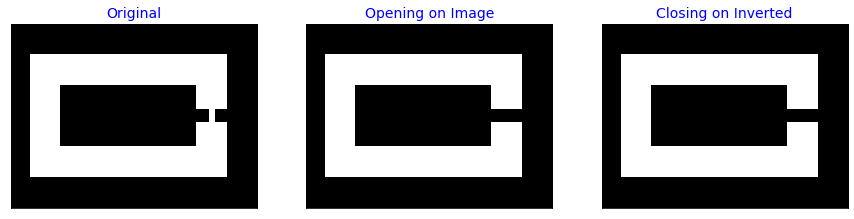

In [15]:
img = cv.imread(im_dir+'morpho1.tif', 0)
img_neg = np.invert(img) # Inverting
kernel = np.ones((3,3), np.uint8)
open_on_img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) # Opening -> erosion followd by dilation
close_on_img_neg = cv.morphologyEx(img_neg, cv.MORPH_CLOSE, kernel) # Closing -> dilation followed by erosion
close_on_img_neg = np.invert(close_on_img_neg) # Inverting

show_images([[img,'g',"Original"],[open_on_img,'g',"Opening on Image"],[close_on_img_neg,'g',"Closing on Inverted"]])

***Morphological Gradient***

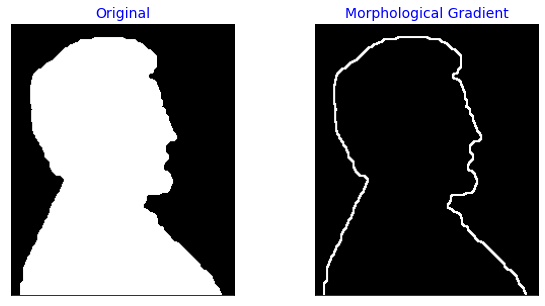

In [18]:
im = cv.imread(im_dir+'lincoln.tif', cv.IMREAD_GRAYSCALE)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))

new = cv.morphologyEx(im, cv.MORPH_GRADIENT, kernel)

show_images([[im,'g',"Original"],[new,'g',"Morphological Gradient"]])

[Applications : connected Components With Stats](https://www.programcreek.com/python/example/89340/cv2.connectedComponentsWithStats)

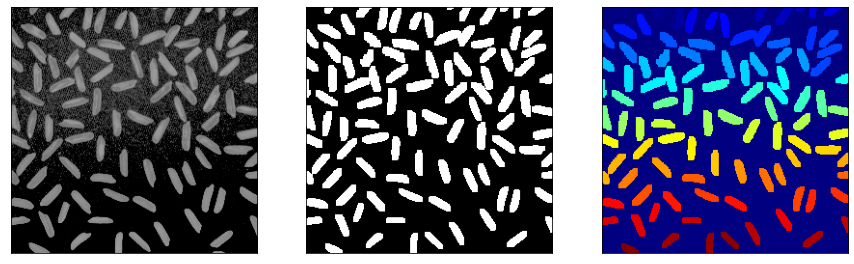

In [32]:
img = cv.imread(im_dir+'rice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (15, 15))
background = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
img = cv.equalizeHist(img)
img = cv.subtract(img, background)

ret, binimage = cv.threshold(img,0,255, cv.THRESH_OTSU)

binimage = cv.morphologyEx(binimage, cv.MORPH_OPEN, np.ones((5,5), np.uint8))
nlabels, labels, stats, centroids = cv.connectedComponentsWithStats(binimage)
labels = np.uint8(labels)

labels = cv.normalize(labels, None, 0, 255, cv.NORM_MINMAX)
labels = cv.applyColorMap(labels, cv.COLORMAP_JET)

show_images([[img,'c'],[binimage,'g'],[labels,'c']])


In [25]:
print(labels.dtype)

uint8


In [23]:
print(np.unique(labels))

[  0   1   2   4  14  16  22  24  34  36  46  48  58  60  66  68  78  80
  90  92 102 104 110 112 122 124 128 134 136 140 146 148 154 156 160 166
 168 172 178 180 184 190 192 198 200 204 210 212 216 222 224 228 232 234
 236 242 244 248 254 255]


In [24]:
print(stats)

[[    0     0   256   256 46711]
 [   19     0     9     8    61]
 [   52     0    16    12   131]
 [   74     0    11    25   211]
 [  146     0     7     4    26]
 [  159     0    12    16   131]
 [  180     0    18    20   204]
 [  201     0     9     6    49]
 [  215     0     8    13    93]
 [  230     0    18    10   123]
 [   86     2    13    26   221]
 [  107     6    13    19   164]
 [  122     7    10    26   201]
 [   36     8    15    22   205]
 [   12    19    24    15   222]
 [  133    20    42    22   473]
 [  211    21    12    25   207]
 [    0    24    13    20   156]
 [  216    25    33    48   644]
 [   60    27    18    16   190]
 [  171    33    24    11   198]
 [   89    34    28    12   258]
 [   18    37    18    22   221]
 [   79    42    24    17   237]
 [  180    43    17    16   159]
 [   56    45    14    18   175]
 [  202    44    13    24   201]
 [  124    46    14    29   244]
 [  153    48    19    25   243]
 [    0    53    13    15   133]
 [   38   